# Introduction
Portugal is a top ten wine exporting country with 3.17% of the market share in 2005. Exports of its vinho verde wine (from the northwest region) have increased by 36% from 1997 to 2007. Vinho Verde is unique in the wine world. Confusingly, it refers to both a style of wine and to the area from which it comes. Vinho Verde (pronounced veen-yo vairdh, not veen-oh ver-day) is Portugal’s largest wine region, stretching to the Spanish border in the north and Atlantic Ocean to the west, and is the only one in the world not named after a place.Vinho Verde has a cool, wet climate – so these bright and breezy wines are generally high in acidity and relatively low in alcohol, intended to be drunk young. https://www.olivemagazine.com/drink/portuguese-vinho-verde-wine-guide/

https://winefolly.com/deep-dive/vinho-verde-the-perfect-poolside-wine-from-portugal/

Wine certification and quality assessment are key elements that may help in preventing illegal adulteration and assures quality.
Quality evaluation is often part of the certification process and can be used
to improve wine making (by identifying the most influential factors) and to
stratify wines such as premium brands. This could be also useful for pricing.
Physicochemical and sensory tests are mutually important.
Physicochemical laboratory tests are routinely used to characterize wine. These include determination of; density, alcohol and pH values  while sensory tests rely on human expertise.  The data were recorded by a computerized system (iLab), which automatically manages the process of wine sample testing from producer requests to laboratory and sensory analysis. Each entry denotes a given test. Please see paper https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377



#Red Wine Quality Data Set
Available on the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/wine+quality). The red wine samples were obtained from the north of Portugal to model red wine quality based on physicochemical tests. The dataset contains a total of 12 variables, which were recorded for 1,599 observations. The datasets are also available from http://www3.dsi.uminho.pt/pcortez/wine/


#Import pandas for organising dataframes

In [4]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


#Description of Qualities
1. Alcohol: the amount of alcohol in wine
2. Volatile acidity: acetic acid content which leading to an unpleasant vinegar taste
3. Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
4. Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)
5. Total Sulfur Dioxide: is the amount of SO2
6. Density: sweeter wines have a higher density
7. Chlorides: the amount of salt
8. Fixed acidity: are non-volatile acids that do not evaporate easily
9. pH: the level of acidity
10. Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
11. Residual sugar: is the amount of sugar remaining after fermentation stops.  (Wines > 45g/ltrs are sweet)

In [5]:
df.shape

(1599, 12)

# Data Inspection
This is a complete data set. No gaps were found in data

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Descriptive Statistics
There is quite a bit of variation between means and standard deviations implying we should consider standardisng variables in pre-modelling

In [7]:
#running descriptive statistics across all the variables
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#Import Libraries for Graphing and Visualization

In [8]:
#Importing required packages.
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

In [9]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [10]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [11]:
df['quality'].count()

1599

<Axes: xlabel='quality', ylabel='count'>

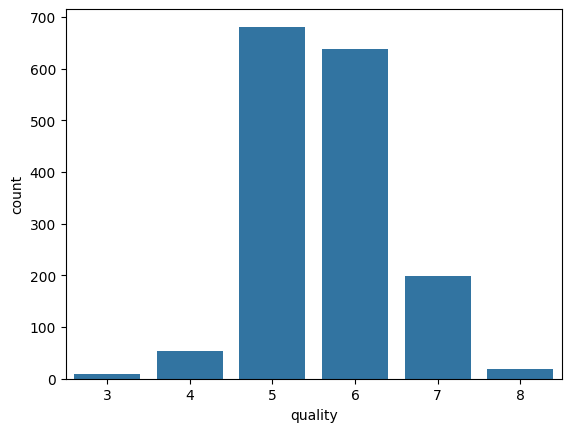

In [12]:
sb.countplot(x='quality', data=df)

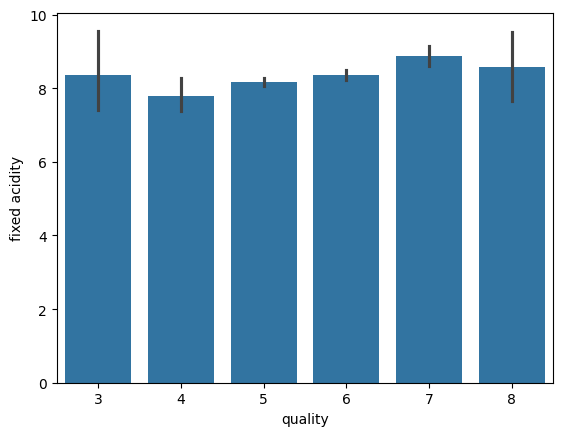

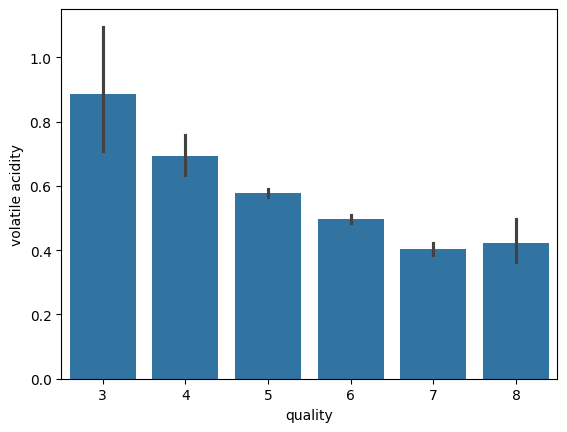

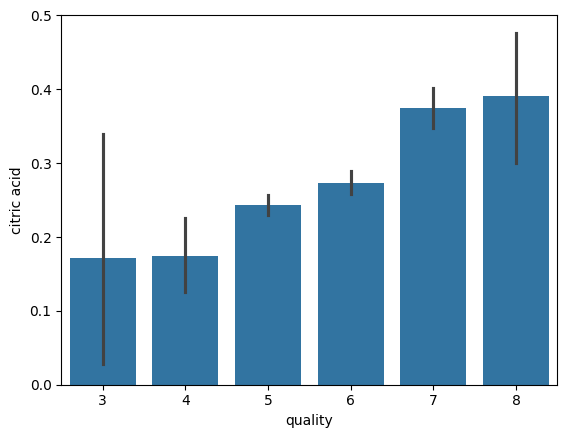

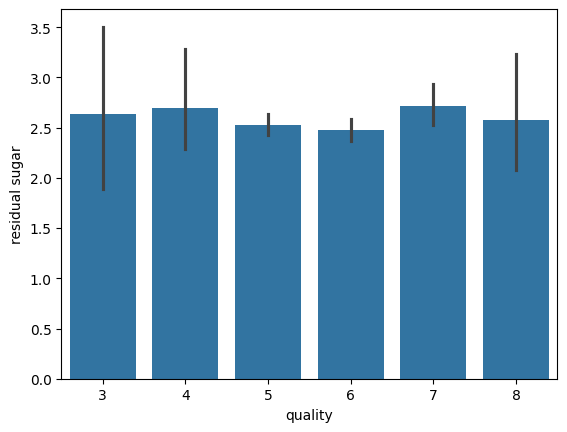

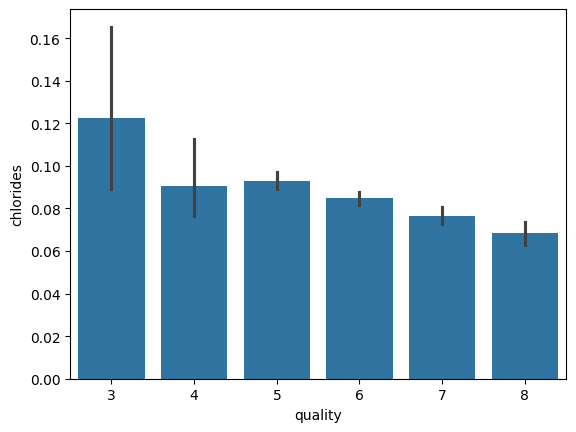

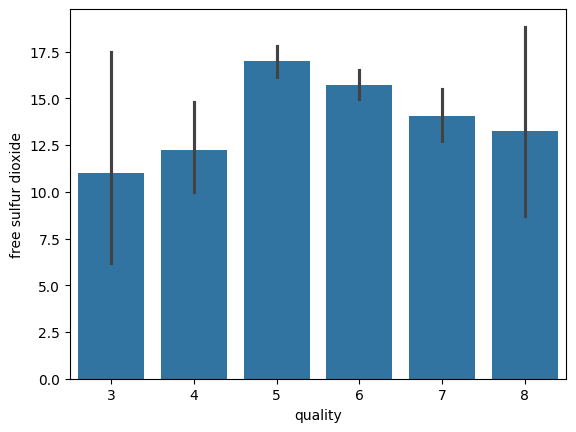

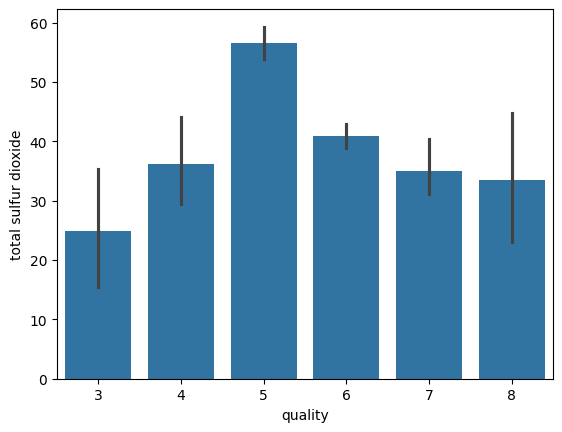

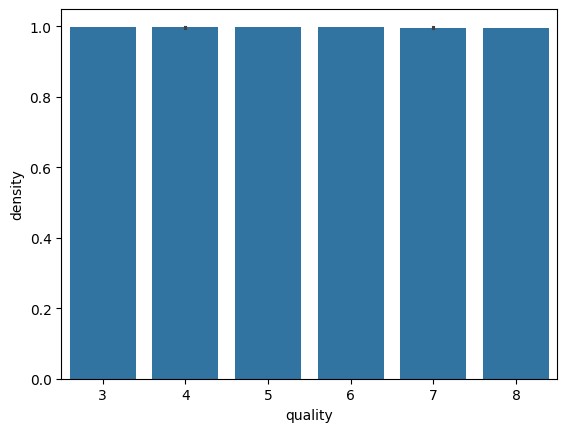

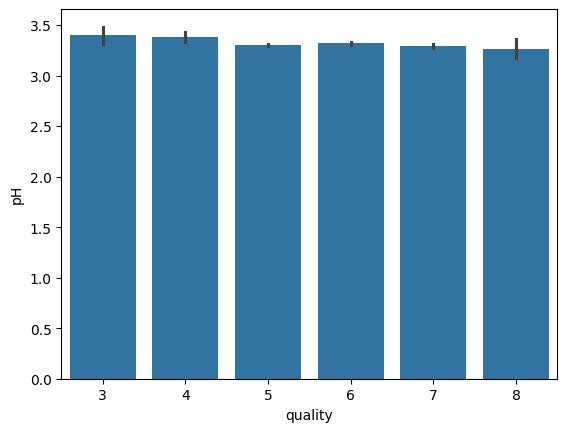

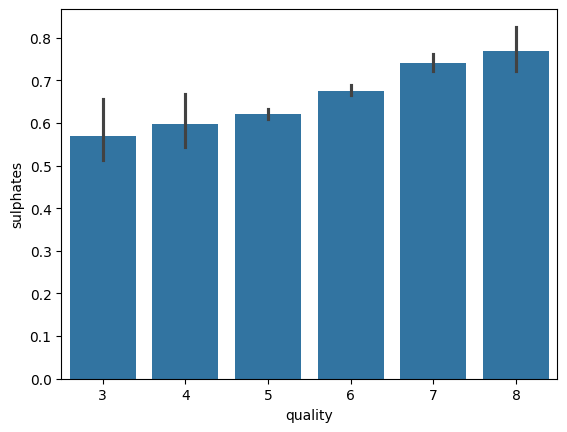

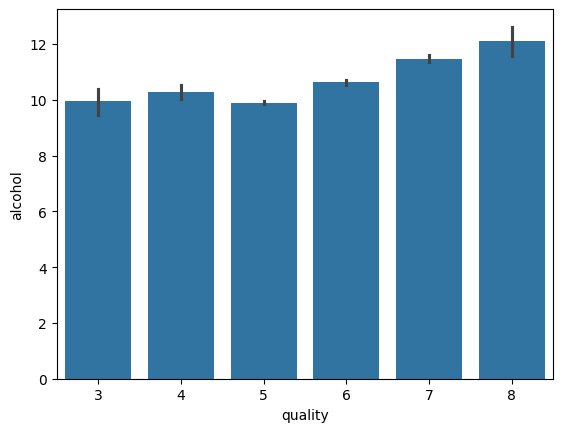

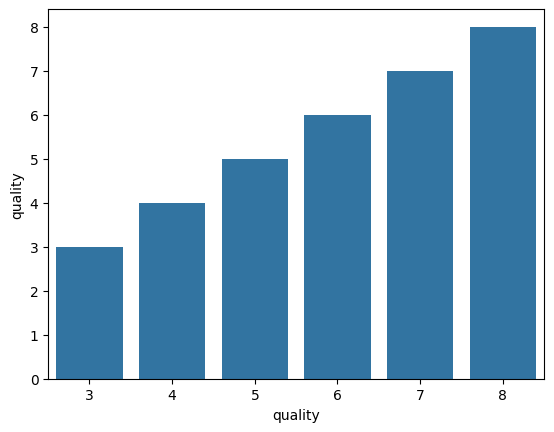

In [13]:
df1 = df.select_dtypes([int, float])


for i, col in enumerate(df1.columns):
    plt.figure(i)
    sb.barplot(x='quality', y =col, data=df1)

<Axes: xlabel='quality', ylabel='alcohol'>

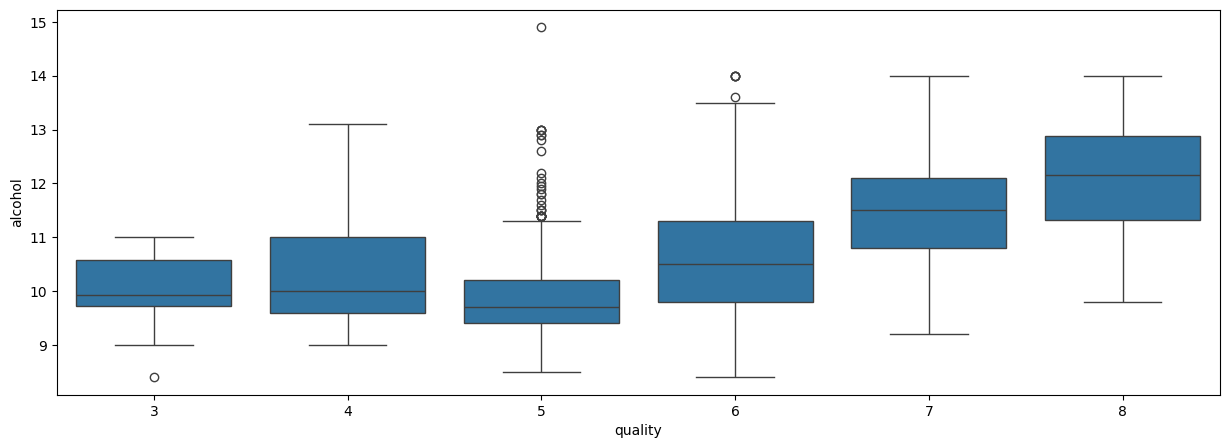

In [14]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="alcohol",   data=df )

<Axes: xlabel='quality', ylabel='volatile acidity'>

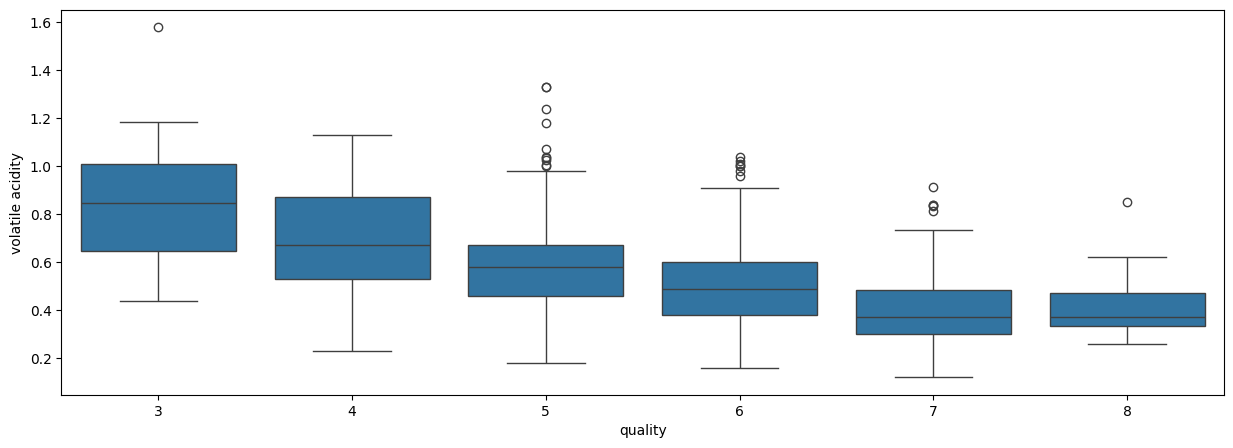

In [15]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="volatile acidity",   data=df )

#Correlation Matrix

<Axes: >

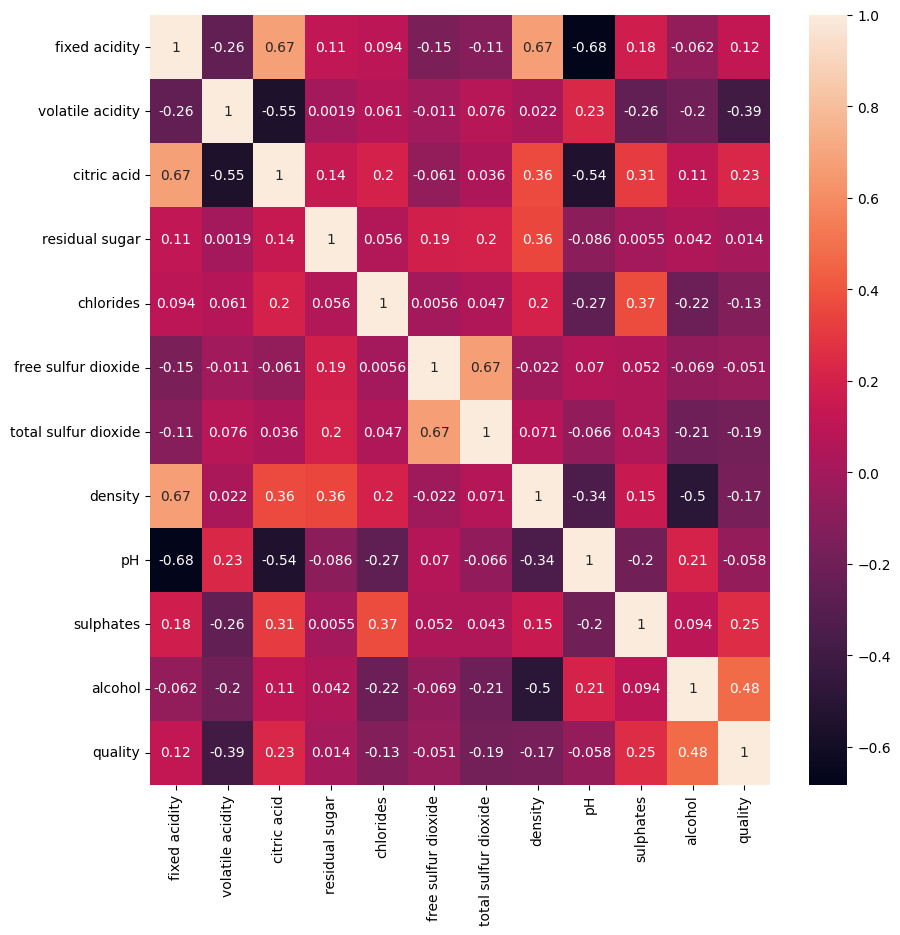

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),color = "k", annot=True)

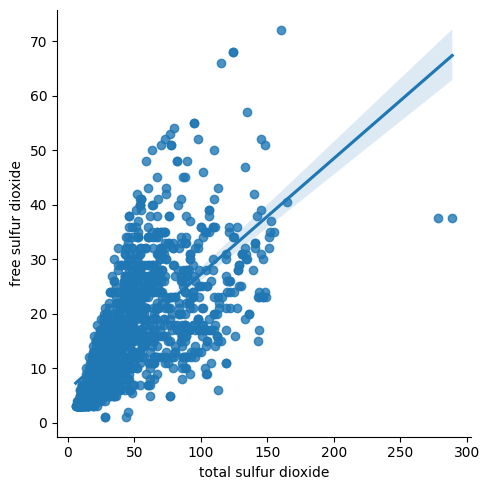

In [17]:
sns.lmplot(x="total sulfur dioxide", y="free sulfur dioxide", data=df)

#Creating Classification bins

Text(0.5, 1.0, 'Data Before Removing Outliers')

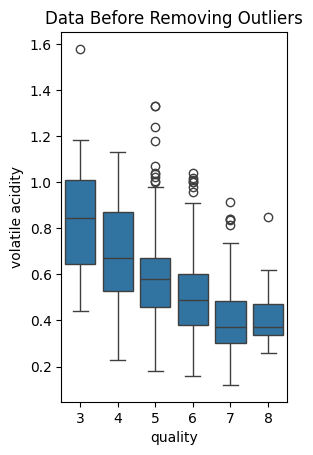

In [18]:
plt.subplot(1, 2, 2)
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Data Before Removing Outliers')

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df = df[~outlier_condition.any(axis=1)]

Text(0.5, 1.0, 'Data After Removing Outliers')

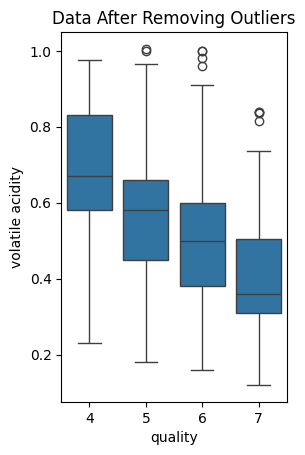

In [20]:
plt.subplot(1, 2, 2)
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Data After Removing Outliers')

<Axes: >

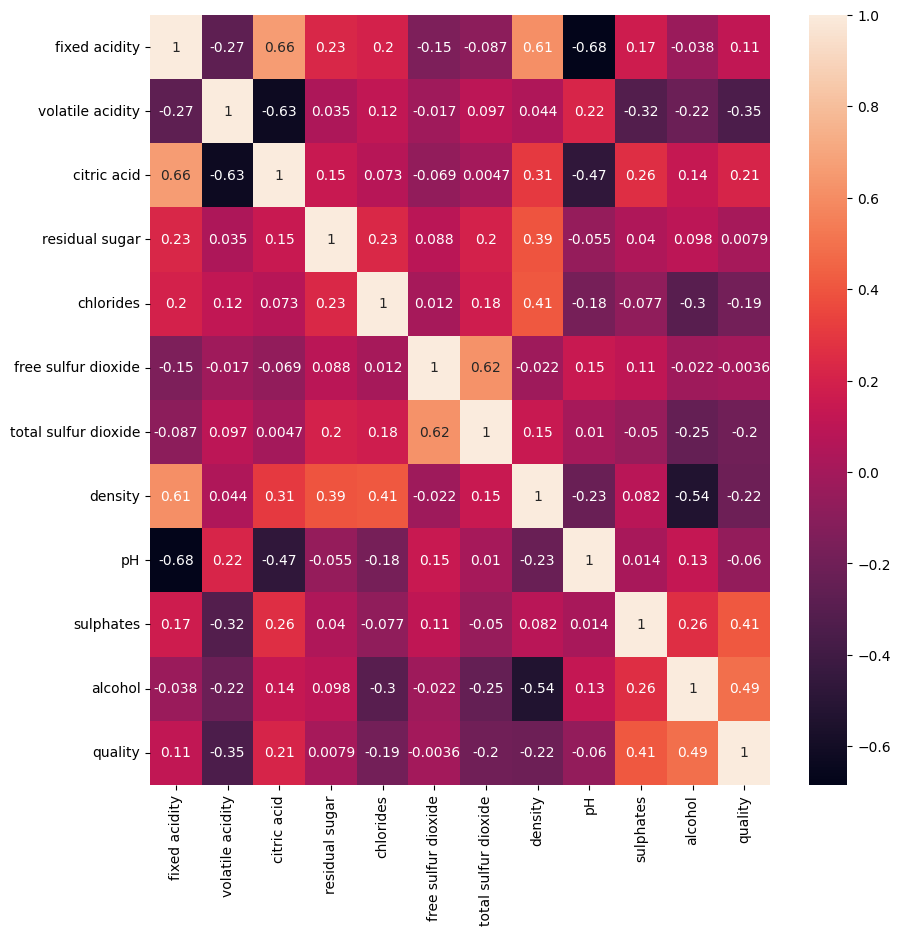

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),color = "k", annot=True)

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,8.162002,0.523066,0.246760,2.185411,0.078586,15.020356,42.268024,0.996584,3.324623,0.631264,10.350792,5.623410
std,1.458270,0.164231,0.179441,0.440972,0.014317,8.792916,26.106438,0.001593,0.131731,0.116098,0.963954,0.721248
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995520,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.500000,0.087000,20.000000,56.000000,0.997600,3.410000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,42.000000,122.000000,1.001000,3.680000,0.980000,13.400000,7.000000


In [23]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

#Importing sklearn packages for Machine Learning

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Classification into ones and zeros using LabelEncoder()

In [25]:
# Assigning a label to our quality variable
label_quality = LabelEncoder()


# Now changing our dataframe to reflect our new label
df['quality'] = label_quality.fit_transform(df['quality'])

#Reviewing the Dataframe

In [26]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0


#Setting the dependent and independent Variables

In [27]:
# https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn
Y = df.quality
X = df.drop('quality', axis=1)

#Split train and test

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#Scaling the data to take account of variations in mean and Standard Deviations

In [29]:
#Feature Scaling
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Machine Learning Models

In [30]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #print model accuracy on the training data.
  print('[0]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[1]Support Vector Machine Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[2]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))


  return knn, svc_lin, gauss, tree, forest

#Evaluating Performance on Training Sets

In [31]:
#Get and train all of the models
model = models(X_train,Y_train)

[0]K Nearest Neighbor Training Accuracy: 0.9310710498409331
[1]Support Vector Machine Training Accuracy: 0.911983032873807
[2]Gaussian Naive Bayes Training Accuracy: 0.8769883351007424
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Random Forest Classifier Training Accuracy: 0.9936373276776246
